In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

In [2]:
data = pd.read_csv(r'..\..\..\Files\Hotel_Reviews.csv', low_memory=False,delimiter=',', encoding='iso-8859-1', decimal='.')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [3]:
# cria novo dataframe a partir das colunas que eu quero
df = data[['Negative_Review', 'Positive_Review', 'Reviewer_Score']]
df.sample(5)

,Negative_Review,Positive_Review,Reviewer_Score
105023,The price of the breakfast,The location to the train station and the fri...,8.8
42400,Front desk staff service,Facility,6.3
17917,I did not like the selection of the breakfast...,No Positive,6.3
200955,Nothing all good except only 1 lift working,Great location for me personally 5 mins from ...,9.2
297928,No Negative,The location and the staff were fab,8.3


In [4]:
# substitui as avaliações "No negative" e "No positive" por string vazia
df.loc[:, 'Positive_Review'] = data.Positive_Review.apply(lambda x: x.replace('No Positive', ''))
df.loc[:, 'Negative_Review'] = data.Negative_Review.apply(lambda x: x.replace('No Negative', ''))
df.sample(5)

,Negative_Review,Positive_Review,Reviewer_Score
509594,,Spacious room and bathroom Very clean and com...,10.0
104163,The price of the breakfast should be included...,Room was nice great birthday gift for my partner,10.0
436379,Staff could have been a little more friendly ...,The beds were lovely and comfy the breakfast ...,8.8
374302,a bit noisy,Great breakfasts definatelly worth the additi...,10.0
324059,,Really easy to get into Amsterdam we hired bi...,9.6


In [6]:
# retorna a coluna positiva ou negativa de acordo com a nota

def calculate_total_review(row):
    if row['Reviewer_Score'] < 4:
        return row['Negative_Review']
    elif row['Reviewer_Score'] > 7:
        return row['Positive_Review']
    else:
        return row['Negative_Review'] + row['Positive_Review']

In [8]:
df.loc[:,'Total_Review'] = df.apply(calculate_total_review, axis=1)

df.sample(20)

,Negative_Review,Positive_Review,Reviewer_Score,Total_Review
227235,,Staff were friendly helpful and polite room w...,9.6,Staff were friendly helpful and polite room w...
139577,noise from other guests,location of hotel,10.0,location of hotel
194301,N A,The lobby is luxury and our room was comforta...,10.0,The lobby is luxury and our room was comforta...
493940,,Everything was smooth and easy and the staff ...,9.6,Everything was smooth and easy and the staff ...
242561,The size and layout of 1st room More a single...,First room allocated was very small with smal...,7.1,First room allocated was very small with smal...
431003,The rooms were incredibly hot We asked to hav...,The location was really good Easy access to m...,5.8,The rooms were incredibly hot We asked to hav...
311241,Nothing for dislike Just if you like to walk ...,Excellent hotel big reception can be relaxed ...,10.0,Excellent hotel big reception can be relaxed ...
503675,Room was ok but design was a little too spars...,Great location for Excel nice position on the...,7.1,Great location for Excel nice position on the...
270352,,excellent location friendly staff and very kn...,8.8,excellent location friendly staff and very kn...
261046,Nothing,Everything,10.0,Everything


In [9]:
# classifica avaliações como negative, neutral e positive
df.loc[:,'review_type'] = df["Reviewer_Score"].apply(
    lambda x: "negative" if x < 4 else ("neutral" if x < 7 else "positive")
)
df.sample(5)

C:\Users\Igor\AppData\Local\Temp\ipykernel_16812\565846759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'review_type'] = df["Reviewer_Score"].apply(


,Negative_Review,Positive_Review,Reviewer_Score,Total_Review,review_type
166806,,Awesome location near all of the social actio...,10.0,Awesome location near all of the social actio...,positive
316958,,good breakfast choice comfortable bed pillows...,9.6,good breakfast choice comfortable bed pillows...,positive
174209,,Upgraded longe area was relaxing and very goo...,7.9,Upgraded longe area was relaxing and very goo...,positive
242473,There was a water tank above our bedroom LG4 ...,The room was good and comfortable Staff were ...,7.1,The room was good and comfortable Staff were ...,positive
56246,,The otel is located opposite Hyde Park You ca...,9.2,The otel is located opposite Hyde Park You ca...,positive


In [10]:
# cria um dataframe somente com o comentário e sua classificação
df_reviews = df[["Total_Review", "review_type"]]
df_reviews

,Total_Review,review_type
0,I am so angry that i made this post available...,negative
1,No real complaints the hotel was great great ...,positive
2,Location was good and staff were ok It is cut...,positive
3,My room was dirty and I was afraid to walk ba...,negative
4,You When I booked with your company on line y...,neutral
...,...,...
515733,no trolly or staff to help you take the lugga...,positive
515734,The hotel looks like 3 but surely not 4 Brea...,neutral
515735,The ac was useless It was a hot week in vienn...,negative
515736,The rooms are enormous and really comfortable...,positive


In [11]:
# separa as avaliações em positive, neutral e negative
positive_reviews = df_reviews[df_reviews.review_type == "positive"]
neutral_reviews = df_reviews[df_reviews.review_type == "neutral"]
negative_reviews = df_reviews[df_reviews.review_type == "negative"]

In [12]:
# determina o número mínimo de avaliações em uma categoria
min_reviews = min(len(positive_reviews), len(neutral_reviews), len(negative_reviews))

# aleatoriza e seleciona um número igual de avaliações de cada categoria
positive_df = positive_reviews.sample(n=min_reviews, random_state=42)
neutral_df = neutral_reviews.sample(n=min_reviews, random_state=42)
negative_df = negative_reviews.sample(n=min_reviews, random_state=42)

# concatena os DataFrames de avaliações positivas, neutras e negativas
df_review_resampled = pd.concat([positive_df, neutral_df, negative_df], ignore_index=True)

df_review_resampled

,Total_Review,review_type
0,Location was excellent rooms were extremely c...,positive
1,very comfortable bed excellent air con great ...,positive
2,The views,positive
3,Clean and comfortable room Kettle and selecti...,positive
4,Beds comfy staff lovely food amazing room spa...,positive
...,...,...
32179,very very poor value for money poky room tiny...,negative
32180,Everything was bad,negative
32181,The breakfast was decent,negative
32182,I was having a very different opinion about S...,negative


Text(0.5, 1.0, 'Review type resampled)')

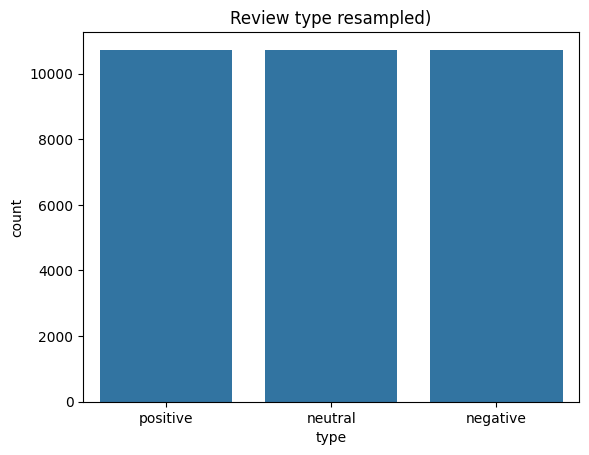

In [13]:
# plotla gráfico para verificar o equilíbrio entre as classificações de dados
sns.countplot(
  x='review_type',
  data=df_review_resampled,
  order=df_review_resampled.review_type.value_counts().index
)

plt.xlabel("type")
plt.title("Review type resampled)")

In [15]:
# remoção de stopwords
stop_words = set(stopwords.words('english'))

# função de remover stopwords do texto
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# remove stopwords do dataframe
df_review_resampled['Total_Review'] = df_review_resampled['Total_Review'].apply(remove_stopwords)

df_review_resampled.to_csv('df_to_train.csv', index=False)
